# Machine Learning Essentials SS25 - Exercise Sheet 1

## Instructions
- `TODO`'s indicate where you need to complete the implementations.
- You may use external resources, but <b>write your own solutions</b>.
- Provide concise, but comprehensible comments to explain what your code does.
- Code that's unnecessarily extensive and/or not well commented will not be scored.

## Exercise 2: The Perceptron Algorithm

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import legend
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from IPython.display import display

In [6]:
def make_scatter_plot(X, x_values, y, title="Scatter Plot") -> None:
    """
    Creates a scatter plot for visualising data: y and the specified features of X.
    Uses different colors for each feature.

    :param X: DataFrame containing the features
    :param x_values: List of feature names to plot
    :param y: Target variable
    :param title: Title of the plot
    :return: None
    """
    fig, ax = plt.subplots()

    colors = ['purple', 'yellow', 'green', 'blue', 'red', 'orange']
    for value, color in zip(x_values, colors):
        # alpha = opacity
        ax.scatter(X[value], y, c=color, label=value, alpha=0.2)

    ax.legend()
    ax.set_title(title)
    ax.grid(True)
    plt.show()

Feature Names:
	- mean radius
	- mean texture
	- mean perimeter
	- mean area
	- mean smoothness
	- mean compactness
	- mean concavity
	- mean concave points
	- mean symmetry
	- mean fractal dimension
	- radius error
	- texture error
	- perimeter error
	- area error
	- smoothness error
	- compactness error
	- concavity error
	- concave points error
	- symmetry error
	- fractal dimension error
	- worst radius
	- worst texture
	- worst perimeter
	- worst area
	- worst smoothness
	- worst compactness
	- worst concavity
	- worst concave points
	- worst symmetry
	- worst fractal dimension



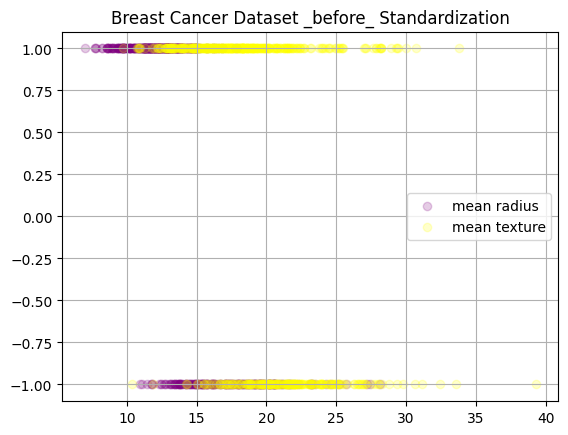

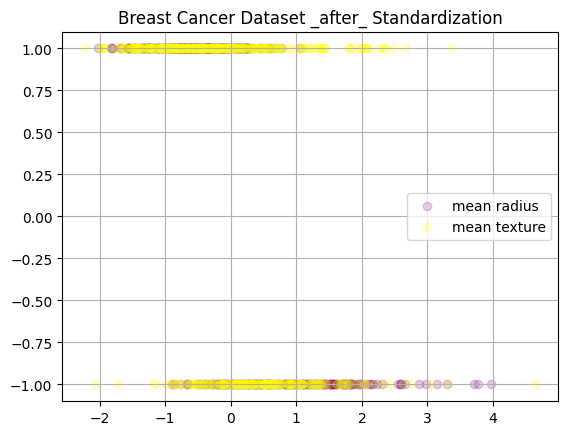

In [7]:
# ===============================
# 1. Load & Visualize the Dataset
# ===============================

# + TODO: Load dataset, print feature names
dataset = load_breast_cancer(return_X_y=True, as_frame=True)
print("Feature Names:", *dataset[0].keys(), sep='\n\t- ', end='\n\n')

# + TODO: Select features & corresponding labels
features = ['mean radius', 'mean texture']
X = dataset[0][features]
# target labels
y = dataset[1]

# Convert labels from {0,1} to {-1,1} to match Perceptron convention from sheet
y = 2 * (y - 0.5)

# Before the standardization, the data instances look hardly separable, they seem to be more uniform.
make_scatter_plot(X, features, y, "Breast Cancer Dataset _before_ Standardization")

# + TODO: Standardize the data to zero mean and unit variance, explain why it's useful
X = (X - X.mean()) / X.std()
# Standardising data allows one to compare measurements from different people excluding
# their differences (biases). Otherwise, the data might be not grouped properly, leading
# to finding a wrong hyperplane or not finding it at all.

# + TODO: Visualize dataset using plt.scatter()
make_scatter_plot(X, features, y, "Breast Cancer Dataset _after_ Standardization")
# We observe that 'mean radius' values are set a bit further apart than 'mean texture' values,
# potentially making them easier to separate.


In [56]:
# ========================
# 2. Implement the Perceptron's training algorithm
# ========================

class Perceptron:
    def __init__(self, learning_rate=0.1, num_epochs=10):
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        self.w = None  # Weights
        self.b = None # Bias
        self.history = [] # Store parameters for decision boundary @ each update for visualization

    def train(self, X, y):
        """Train the perceptron using the online Perceptron algorithm."""
        # n_samples = N, n_features = D
        n_samples, n_features = X.shape
        # + TODO: Initialize weights and bias
        self.w = np.random.randn(n_features)
        self.b = np.random.randn()

        # Train for num_epochs iterations
        for _ in range(self.num_epochs):
            for i in range(n_samples):
                # I used ChatGPT to figure out how to access the i-th row of a DataFrame
                X_i = X.iloc[i].values
                y_i = y.iloc[i]

                # + TODO: Implement the update rule
                if self.predict(X_i) != y_i:
                    multiplication = self.learning_rate * y_i
                    self.w += multiplication * X_i
                    self.b += multiplication
                    self.history.append((self.w, self.b)) # Save state for visualization

    def predict(self, X):
        """Predict the label of a sample."""
        # + TODO: Implement the prediction function
        # With weights transposed, the dimensions were not compatible
        return np.sign(self.w.dot(X.transpose()) + self.b)

In [57]:
def get_accuracy(y_true, y_pred):
    """Compute the accuracy of the predictions."""
    return np.mean(y_true == y_pred)

In [58]:
# ========================
# 3. Train the Perceptron & Evaluate Performance
# ========================

# + TODO: Split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=14)

# + TODO: Initialize the Perceptron and train it on the training set
perceptron = Perceptron()
perceptron.train(X_train, y_train)

# + TODO: Use the trained Perceptron to compute the accuracy on the training set and on the test set
train_acc = get_accuracy(perceptron.predict(X_train), y_train)
test_acc = get_accuracy(perceptron.predict(X_test), y_test)

print(f"Training Accuracy: {train_acc:.3f}")
print(f"Test Accuracy: {test_acc:.3f}")

Training Accuracy: 0.824
Test Accuracy: 0.833


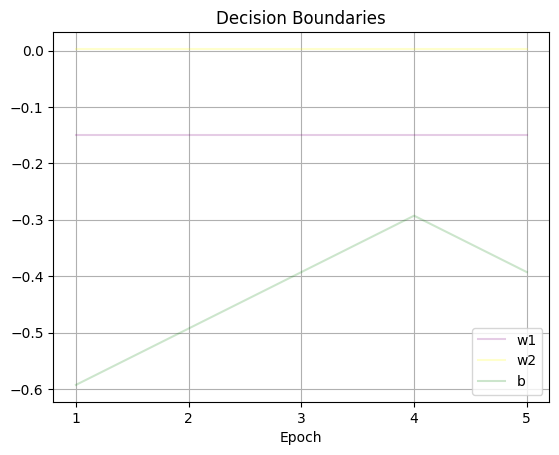

In [75]:
# ========================
# 4. Plot decision boundary evolution
# ========================

# Visualize the first 5 consecutive decision boundaries for data
decision_boundaries = perceptron.history[:5] # Get the parameters of the first 5 decision boundaries used during training

# + TODO: Plot decision boundaries for iterations 1-5
w1 = [w[0] for w, b in decision_boundaries]
w2 = [w[1] for w, b in decision_boundaries]
b = [b for w, b in decision_boundaries]

fig, ax = plt.subplots()
labels = ["w1", "w2", "b"]
colors = ['purple', 'yellow', 'green']
for value, color, label in zip((w1, w2, b), colors, labels):
    # alpha = opacity
    ax.plot(value, c=color, label=label, alpha=0.2)

ax.legend()
ax.set_title("Decision Boundaries")
ax.grid(True)
ax.set_xlabel("Epoch")
ax.set_xticks(range(5))
ax.set_xticklabels(range(1, 6))
plt.show()

In [78]:
len(perceptron.history)

796

### 5.
+ TODO: How many updates do you need until convergence (i.e. until no more model updates
occur)? Explain why.

Around 750-800 updates were necessary to reach convergence. The model arrived at a point where either it could predict any label correctly or the epochs went out. We see that the performance on the testing set is even higher than on the training set, so it generalized well.

In [80]:
# ========================
# 6. Evaluate Performance Over Multiple Runs
# ========================
test_accuracies = []
# + TODO: Evaluate performance over multiple runs. Compute and store test accuracies
for _ in range(500):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=14)

    perceptron = Perceptron()
    perceptron.train(X_train, y_train)

    test_accuracies.append(get_accuracy(perceptron.predict(X_test), y_test))

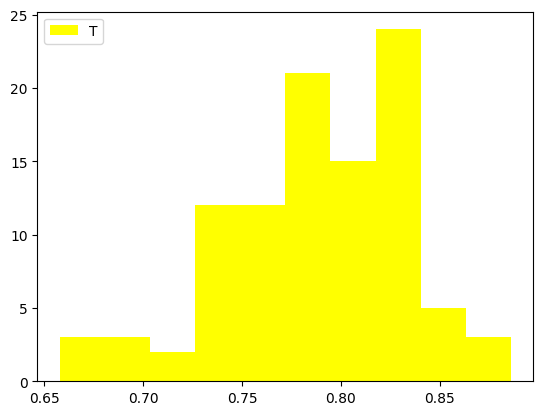

In [79]:
# TODO: Plot histogram for the test accuracies
# WITH 100 RUNS
plt.hist(test_accuracies, color="yellow")
legend("Test Accuracies", loc="upper left")
plt.show()

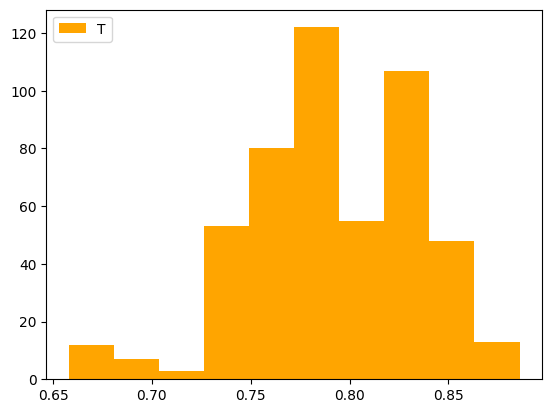

In [81]:
# TODO: Plot histogram for the test accuracies
# WITH 500 RUNS
plt.hist(test_accuracies, color="orange")
legend("Test Accuracies", loc="upper left")
plt.show()

### (a)
+ TODO: What does the shape of the histogram tell you?

At the first glance, the histogram looks as a bell-curve with gaps. I assumed that with more runs, the distribution would approximate a normal distribution closer but with 500 runs instead of 100, it didn't happen.

The range of accuracies is between 0.7 and 0.9, with the most frequent values around 0.73 and 0.83. None of them is prevalent.

On the good side, the mean and the median are almost equal, and the standard deviation is relatively low, which indicates that the distribution is not skewed.


In [4]:
# (b)
# + TODO: Compute the sample mean and standard deviation of the test accuracy

In [82]:
np.mean(test_accuracies)

np.float64(0.790719298245614)

In [83]:
np.median(test_accuracies)

np.float64(0.7894736842105263)

In [84]:
np.std(test_accuracies)

np.float64(0.044419095187048466)

### (c)
+ TODO: Given enough data points and for many training runs, what type of probability distribution would the histogram approximate and what is the reason for that?

The histogram would approach the bimodal distribution. I suppose that the peaks might correspond to the two features we based the training on.

In [85]:
# (d)
#TODO: Add noise by flipping p% of labels. Visualize the effect using histograms for each p.

test_accuracies = {}
p_values = [0, 10, 20, 30, 40, 50] # % of flipped training labels
for p_value in p_values:
    test_accuracies[p_value] = []
    for _ in range(100):
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=14)

        flipped_values = 0
        for random_i in np.random.permutation(range(len(y_train))):
            if flipped_values >= p_value:
                break
            # Flip the labels
            y_train.iloc[random_i] = - y_train.iloc[random_i]
            flipped_values += 1

        perceptron = Perceptron()
        perceptron.train(X_train, y_train)

        test_accuracies[p_value].append(get_accuracy(perceptron.predict(X_test), y_test))

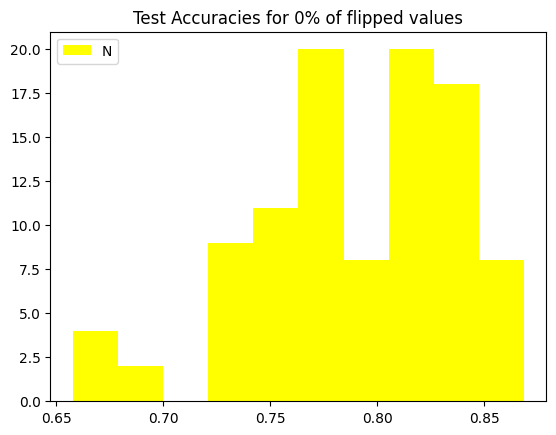

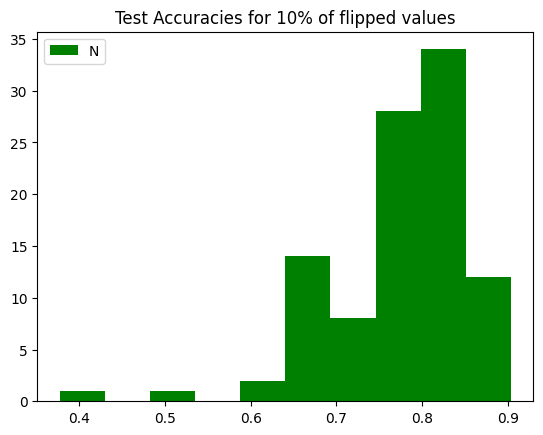

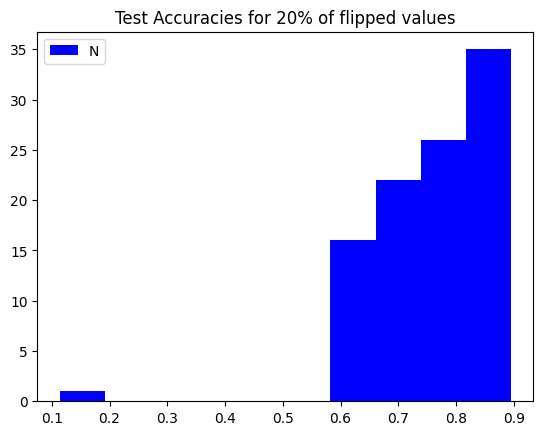

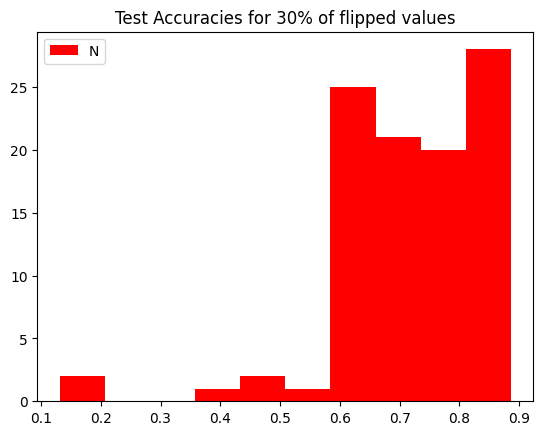

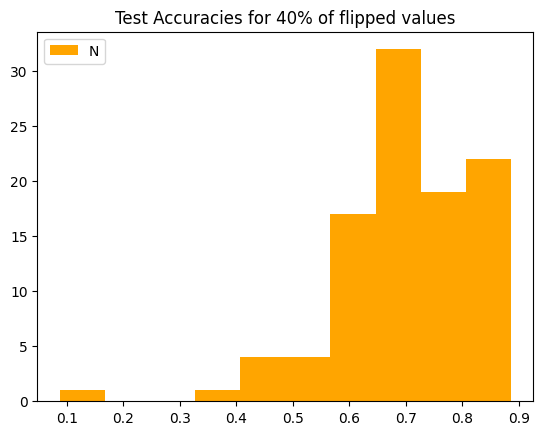

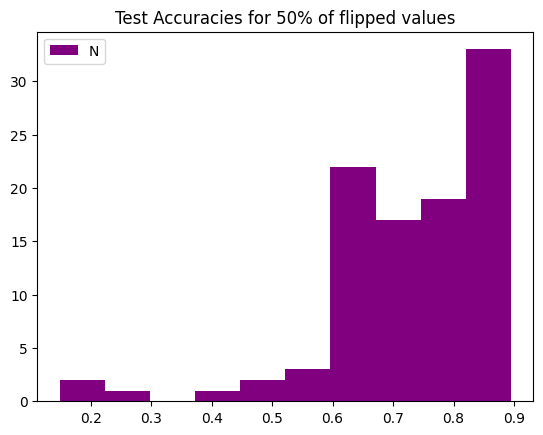

In [87]:
colors = ['yellow', 'green', 'blue', 'red', 'orange', 'purple']
for (p_value, accuracies), color in zip(test_accuracies.items(), colors):
    plt.hist(accuracies, color=color)
    legend(f"Number of Accuracies", loc="upper left")
    plt.title(f"Test Accuracies for {p_value}% of flipped values")
    plt.show()

In [89]:
display(np.mean(test_accuracies[20]))
display(np.median(test_accuracies[20]))
display(np.std(test_accuracies[20]))

np.float64(0.7599122807017545)

np.float64(0.7719298245614035)

np.float64(0.10351364097974108)

In [90]:
display(np.mean(test_accuracies[50]))
display(np.median(test_accuracies[50]))
display(np.std(test_accuracies[50]))

np.float64(0.7275438596491226)

np.float64(0.7456140350877193)

np.float64(0.14046497555164827)

+ TODO: Interpret the results

We can clearly observe that the noise introduced randomness into the models, leading to both way worse (10% of accuracy) and slightly better (90% of accuracy) models. The distributions generally stayed the same, except for the one with 20% noise, which doesn't look bimodal anymore but rather unsymmetrical, skewed to the right. Furthermore, the mean and median got a bit higher, while still staying close to each other. The standard deviation increased a bit, too, which seems a logical consequence of randomness.

On the other hand, for the case of 50% noise, the mean and median didn't degrade much, but the standard deviation increased significantly. Therefore, the deviation seems to be a more reliable metric than the mean or median.

I think that if there were drastic improvements happening under this setting, it would mean that the dataset quality has to be questioned.